In [1]:
import pandas as pd
import numpy as np
import re
import emoji
import string,time
exclude=string.punctuation
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('wordnet')  # for lemmatization
# nltk.download('averaged_perceptron_tagger')  # for POS tagging

In [2]:
slangs=pd.read_csv("slang.csv")
slangs.drop("Unnamed: 0",axis=1,inplace=True)
slangs.head()
chatword_dict=dict(zip(slangs['acronym'],slangs['expansion']))
df=pd.read_csv("IMDB Dataset.csv")

In [3]:
def correct_spelling(text):
    corrected_text = str(TextBlob(text).correct())
    return corrected_text

# stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_text(text):
    text = text.split()
    new_text = []
    for word in text:
        new_text.append(ps.stem(word))
    return " ".join(new_text)

# removing stopwords

def remove_stopwords(text):
    stop_words=stopwords.words('english')
    text = text.split()
    new_text=[]
    for word in text:
        if word in stop_words:
            new_text.append('')
        else:
            new_text.append(word)
    return " ".join(new_text)

def chat_convert(text):
    text = text.split()
    new_text = []
    for word in text:
        if word.lower() in chatword_dict:
            new_text.append(chatword_dict[word.lower()])
        else:
            new_text.append(word)
    return " ".join(new_text)
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # miscellaneous symbols
        u"\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


import spacy
nlp = spacy.load("en_core_web_sm")
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

def replace_emojis(text):
    return emoji.demojize(text)

# to tokenise we can use different methods , like split , and regex, but these are not that much effective , so we can use nltk word_tokenize method
from nltk.tokenize import word_tokenize,sent_tokenize
def nltk_tokenize(text):
    return word_tokenize(text)
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    text = text.split()
    new_text = []
    for word in text:
        new_text.append(lemmatizer.lemmatize(word, pos='v'))
    return " ".join(new_text)


import spacy
nlp=spacy.load("en_core_web_sm")
def spacy_tokenize(text):
    doc=nlp(text)
    tokens=[tokens.text for tokens in doc]
    return tokens


def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # remove emails
    text = re.sub(r'\S+@\S+\.\S+', '', text)
    # convert chat words to normal words
    text = chat_convert(text)
    
    # correct spelling
    # text = correct_spelling(text)
    


    # remove special characters and punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
     


    # # replace emojis with text
    # text = replace_emojis(text)
    # #remove emojis
    # text = text.encode('ascii', 'ignore').decode('ascii')
    #or
    text= remove_emoji(text)
    # remove stopwords
    text = remove_stopwords(text)



    # stemming
    # text= stem_text(text)
    # lemmatization
    text= lemmatize_text(text)

    # # tokenize text using nltk
    # text= nltk_tokenize(text)
    
    # text=spacy_tokenize(text)

    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip() 
   
    
    return text

In [4]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# punctuations = string.punctuation
# def lemmatize_text(text):
#     sentence=nltk.word_tokenize(text)
#     for word in sentence:
#         if word in punctuations:
#             sentence.remove(word)
#     sentence
#     print("{0:20}{1:20}".format("Word","Lemmatized Form"))
#     for word in sentence:
#         print("{0:20}{1:20}".format(word, lemmatizer.lemmatize(word,pos='v')))
        

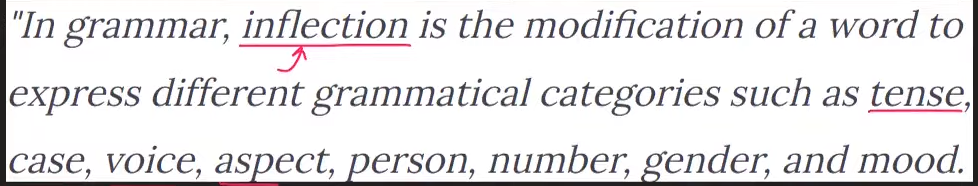

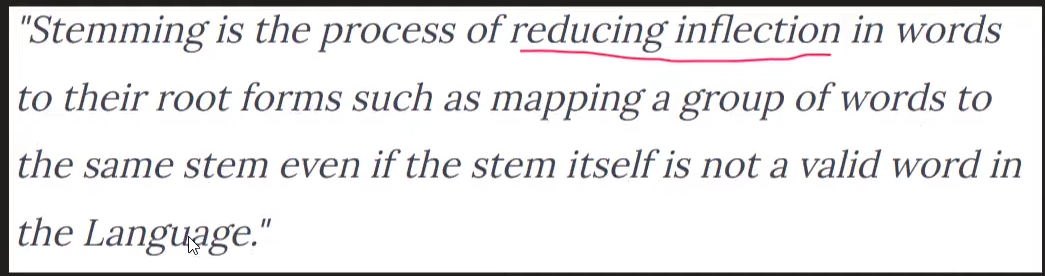

In [5]:
sample_text = """
<h1>Welcom to my blog !</h1> 😊😊
Hey frndz, 2moro we'll go 2nite partyyyy!!! 🎉🎉
Visit my site at https://www.example.com or http://funstuff.org for more info.
Contact me at crazy_coder99@gmail.com 😎
This is soooo coool & amazzinggg!!! <br> Can't wait 4eae 😍
Plzzzz follow me on Insta 👉 www.instagram.com/crazycoder
"""
cleaned_text = clean_text(sample_text)
print("Original Text:\n", sample_text)
print("\nCleaned Text:\n", cleaned_text)

Original Text:
 
<h1>Welcom to my blog !</h1> 😊😊
Hey frndz, 2moro we'll go 2nite partyyyy!!! 🎉🎉
Visit my site at https://www.example.com or http://funstuff.org for more info.
Contact me at crazy_coder99@gmail.com 😎
This is soooo coool & amazzinggg!!! <br> Can't wait 4eae 😍
Plzzzz follow me on Insta 👉 www.instagram.com/crazycoder


Cleaned Text:
 welcom time miss blog hey frndz tomorrow well go tonight partyyyy visit miss site info contact soooo coool amazzinggg cant wait ever ever plzzzz follow insta


In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['cleaned_review'] = df['review'].apply(clean_text)


In [ ]:
df["cleaned_review"][0]

'one reviewers mention watch 1 oz episode youll hook right exactly happen hell methe first thing strike oz wait see think think brutality unflinching scenes violence set right word go trust show faint hearted timid show pull punch hell regard time drug sex violence think think hardcore classic use wordit call oz nickname give time oswald maximum security state penitentary information technology focus mainly emerald city author note experimental section prison cells glass front face inwards significant shout privacy high agenda em city home time manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy dealings shady agreements never far awayi would say main appeal show due time fact information technology go show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike significant shout nasty information technology wait see surreal couldnt say wait see ready watch dev